## k-Means 2D

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Base de dados :

In [2]:
data_1 = np.random.randn(200, 2) + np.array([1,1])
data_2 = np.random.randn(200,2) + np.array([5,5])
data_3 = np.random.randn(200,2) + np.array([8,1])
data = np.concatenate((data_1, data_2, data_3), axis = 0)
data.shape

(600, 2)

## Visualização da base de dados :

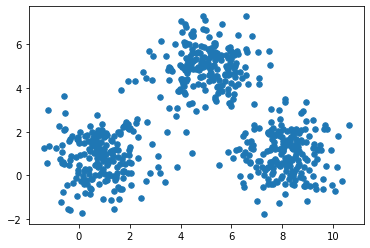

In [3]:
plt.scatter(data[:,0], data[:,1], s=30)

## Escolha do número de clusters :

In [4]:
k = 3
n = data.shape[0]
c = data.shape[1]

## Inicialização dos centróides :

In [5]:
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean
print(centers)

[[3.26315693 4.37222699]
 [2.39065435 4.51484207]
 [3.9150678  2.49601705]]


## Visualização dos primeiros centróides :

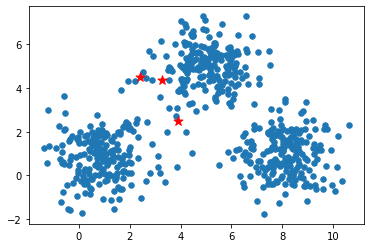

In [6]:
plt.scatter(data[:,0], data[:,1], s=30)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=90)

## Autalização dos centróides :

In [7]:
centers_old = np.zeros(centers.shape)
centers_new = deepcopy(centers)
print(centers_old)
print('')
print(centers_new)

[[0. 0.]
 [0. 0.]
 [0. 0.]]

[[3.26315693 4.37222699]
 [2.39065435 4.51484207]
 [3.9150678  2.49601705]]


## Inicialização das variáveis do algoritmo k-Means :

In [8]:
clusters = np.zeros(n)
distances = np.zeros((n,k))
distortions = np.zeros(k)
distortion_total = 0
error = np.linalg.norm(centers_new - centers_old)
print(error)

8.798945737298121


## Algortimo k-Means :

In [9]:
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
        distortions[i] = np.linalg.norm(data[clusters == i] - centers_new[i], axis=1).sum()
    
    error = np.linalg.norm(centers_new - centers_old)
    
    distortion_total = distortions.sum()

print(centers_old)    
print('')
print(centers_new)
print('')
print(distortions)
print('')
print(distortion_total)
print('')
print(error)

[[4.99500106 4.97434368]
 [0.91511361 0.86193312]
 [8.11139236 0.96453984]]

[[4.99500106 4.97434368]
 [0.91511361 0.86193312]
 [8.11139236 0.96453984]]

[241.42593271 247.13769781 239.4886165 ]

728.0522470269607

0.0


## Visualização dos centróides finais :

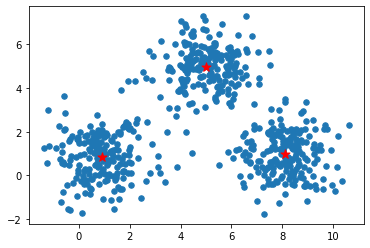

In [10]:
plt.scatter(data[:,0], data[:,1], s=30)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='r', s=90)

## Visualização dos clusters finais :

<AxesSubplot:xlabel='x_axis', ylabel='y_axis'>

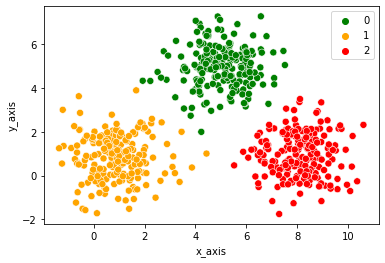

In [11]:
data_cluster = pd.DataFrame(data)
data_cluster[2] = clusters
data_cluster.rename({0:'x_axis', 1:'y_axis', 2:'cluster'}, axis = 1, inplace = True)
sns.scatterplot(data = data_cluster, x = 'x_axis', y = 'y_axis', hue = data_cluster.cluster.tolist(), s=50,  palette=['green','orange','red'])

## Visualização da função 'Elbow' :

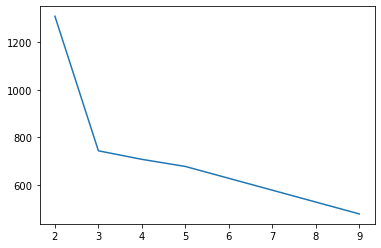

In [12]:
plt.plot([2,3,4,5,9],[1310,743,707,677,477])